# Logistic regression for multi-class classification

## import libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

In [1]:
from google.colab import drive 
drive.mount('/content/drive/')

Mounted at /content/drive/


## load data

In [4]:
directory_data  = './drive/MyDrive/'
filename_data   = 'assignment_05_data.npz'
data            = np.load(os.path.join(directory_data, filename_data))

x_train = data['x_train']
y_train = data['y_train']

x_test  = data['x_test']
y_test  = data['y_test']

num_data_train  = x_train.shape[0]
num_data_test   = x_test.shape[0]

print('*************************************************')
print('size of x_train :', x_train.shape)
print('size of y_train :', y_train.shape)
print('*************************************************')
print('size of x_test :', x_test.shape)
print('size of y_test :', y_test.shape)
print('*************************************************')
print('number of training image :', x_train.shape[0])
print('height of training image :', x_train.shape[1])
print('width of training image :', x_train.shape[2])
print('*************************************************')
print('number of testing image :', x_test.shape[0])
print('height of testing image :', x_test.shape[1])
print('width of testing image :', x_test.shape[2])
print('*************************************************')

*************************************************
size of x_train : (20000, 28, 28)
size of y_train : (20000, 10)
*************************************************
size of x_test : (8000, 28, 28)
size of y_test : (8000, 10)
*************************************************
number of training image : 20000
height of training image : 28
width of training image : 28
*************************************************
number of testing image : 8000
height of testing image : 28
width of testing image : 28
*************************************************


## number of classes

In [5]:
nClass = y_train.shape[1]

print('*************************************************')
print('number of classes :', nClass)
print('*************************************************')

*************************************************
number of classes : 10
*************************************************


## vectorize image data

In [6]:
vector_x_train  = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])
vector_x_test   = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2])

print('*************************************************')
print('dimension of the training data :', vector_x_train.shape)
print('dimension of the testing data :', vector_x_test.shape)
print('*************************************************')
print('dimension of the training label :', y_train.shape)
print('dimension of the testing label :', y_test.shape)
print('*************************************************')

*************************************************
dimension of the training data : (20000, 784)
dimension of the testing data : (8000, 784)
*************************************************
dimension of the training label : (20000, 10)
dimension of the testing label : (8000, 10)
*************************************************


## index for each class

In [7]:
index_train = {}
index_test  = {}

number_index_train  = np.zeros(nClass)
number_index_test   = np.zeros(nClass)

print('*************************************************')

for i in range(nClass):

    index_train[i]  = np.where(y_train[:, i] == 1)
    index_test[i]   = np.where(y_test[:, i] == 1)

    number_index_train[i]   = np.shape(index_train[i])[1]
    number_index_test[i]    = np.shape(index_test[i])[1]

    print('number of the training data for class %2d : %5d' % (i, number_index_train[i]))
    print('number of the testing data for class %2d : %5d' % (i, number_index_test[i]))

print('*************************************************')

*************************************************
number of the training data for class  0 :  2000
number of the testing data for class  0 :   800
number of the training data for class  1 :  2000
number of the testing data for class  1 :   800
number of the training data for class  2 :  2000
number of the testing data for class  2 :   800
number of the training data for class  3 :  2000
number of the testing data for class  3 :   800
number of the training data for class  4 :  2000
number of the testing data for class  4 :   800
number of the training data for class  5 :  2000
number of the testing data for class  5 :   800
number of the training data for class  6 :  2000
number of the testing data for class  6 :   800
number of the training data for class  7 :  2000
number of the testing data for class  7 :   800
number of the training data for class  8 :  2000
number of the testing data for class  8 :   800
number of the training data for class  9 :  2000
number of the testing data f

## plot data

In [8]:
def plot_data_grid(data, index_data, nRow, nCol):

    fig, axes = plt.subplots(nRow, nCol, constrained_layout=True, figsize=(nCol * 3, nRow * 3))

    for i in range(nRow):
        for j in range(nCol):

            k       = i * nCol + j
            index   = index_data[k]

            axes[i, j].imshow(data[index], cmap='gray', vmin=0, vmax=1)
            axes[i, j].xaxis.set_visible(False)
            axes[i, j].yaxis.set_visible(False)

    plt.show()

In [9]:
nRow    = 2
nCol    = 4
nPlot   = nRow * nCol

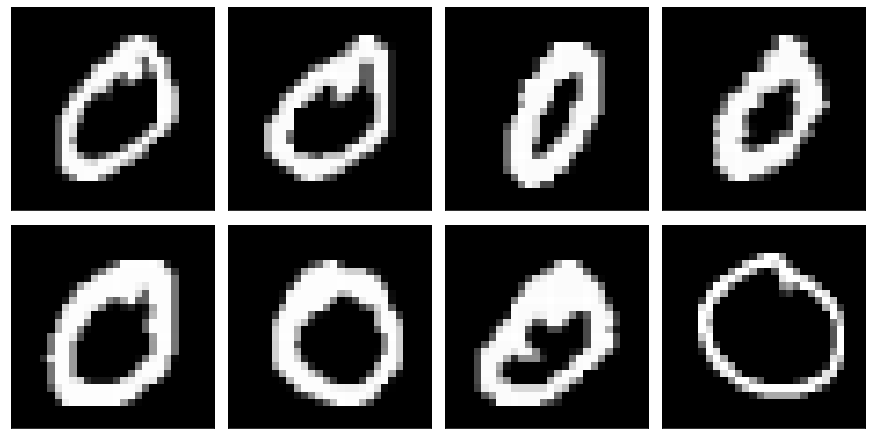

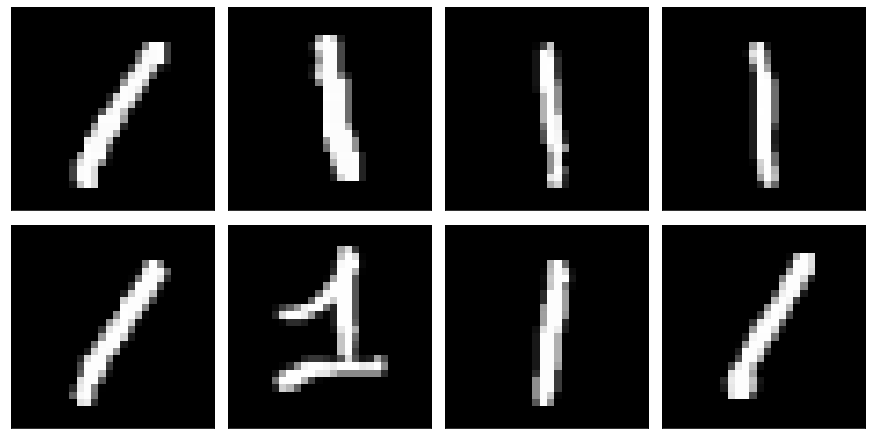

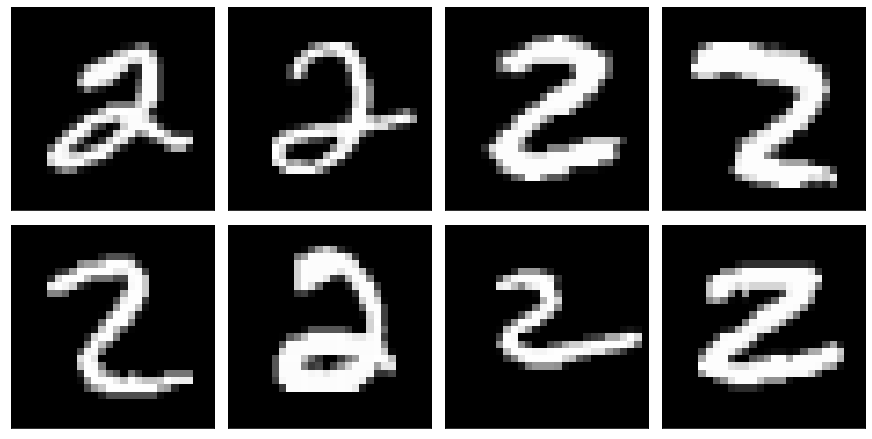

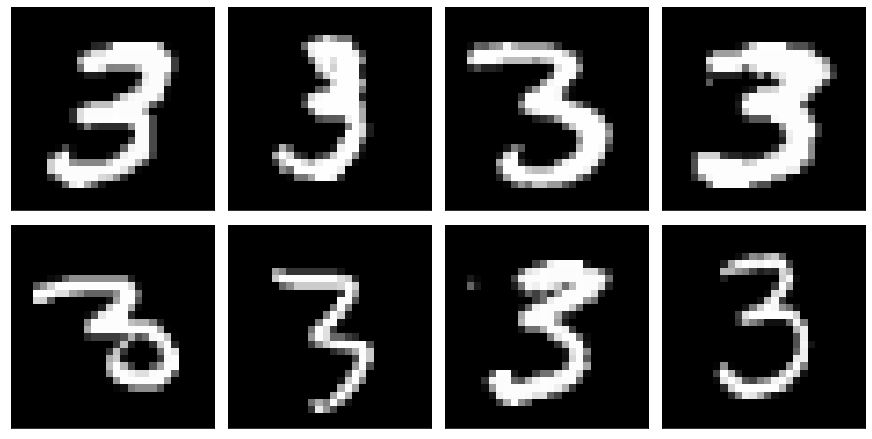

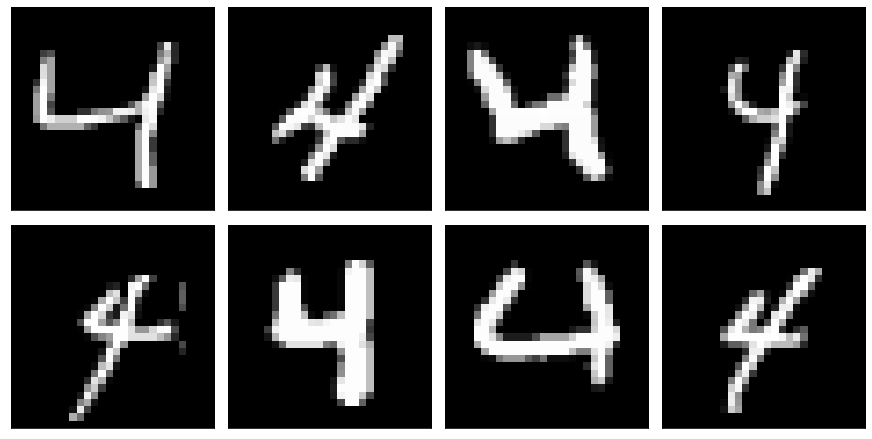

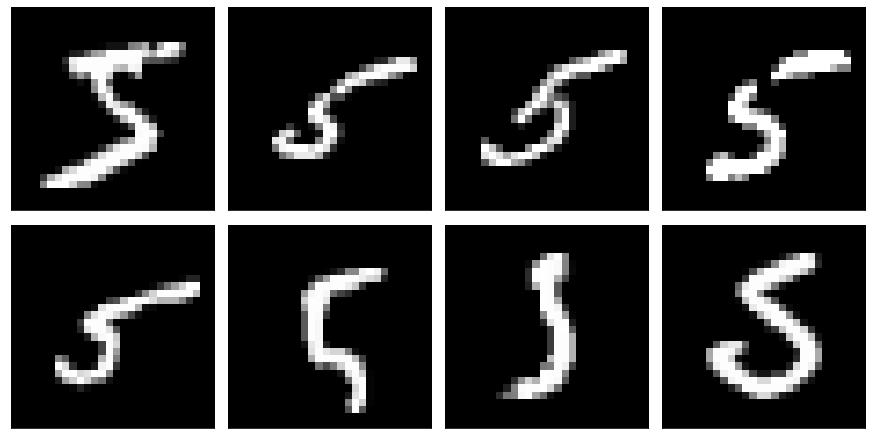

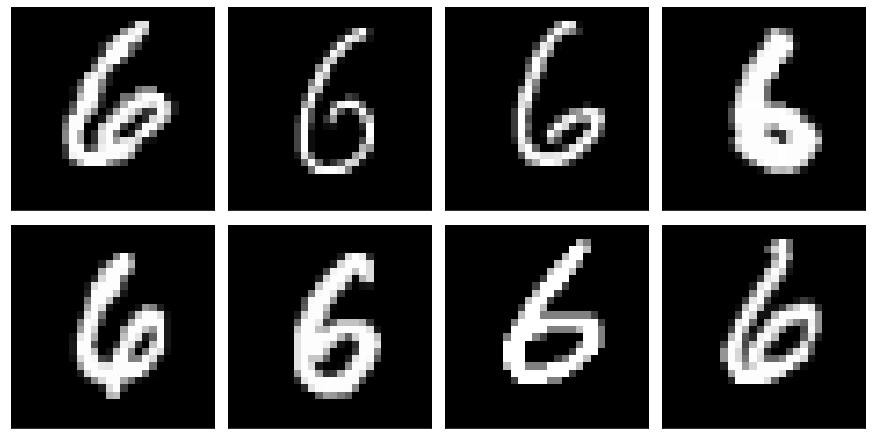

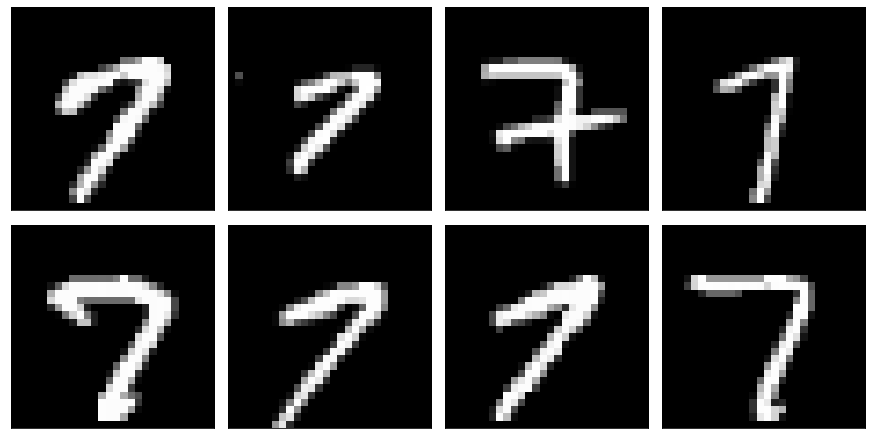

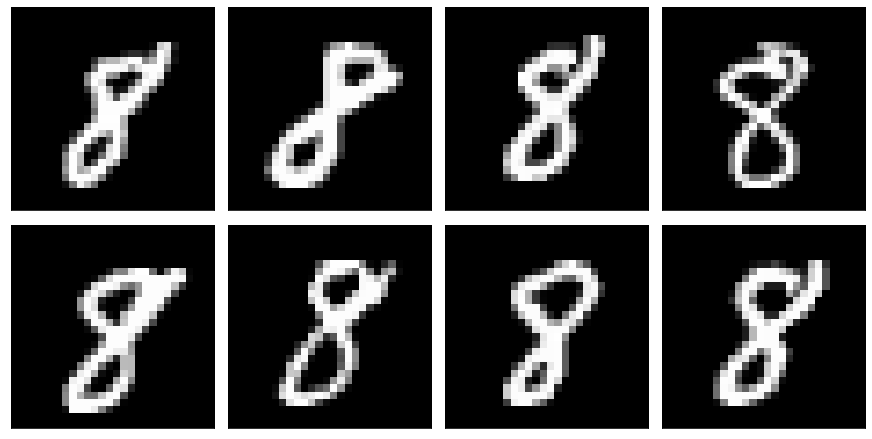

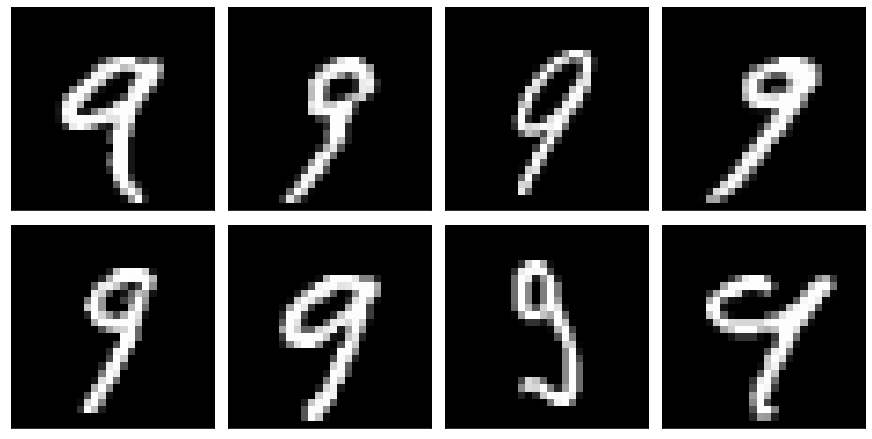

In [10]:
for i in range(nClass):

    index_class_plot = index_train[i][0][0:nPlot]
    plot_data_grid(x_train, index_class_plot, nRow, nCol)

## linear layer

In [11]:
def layer_linear(input, weight):

    output = np.dot(input, weight)

    return output

## Softmax function

In [12]:
def activation_softmax(input):
    max = np.max(input, axis=1,keepdims=True) #returns max of each row and keeps same dims
    e_x = np.exp(input - max) #subtracts each row with its max value
    sum = np.sum(e_x,axis=1,keepdims=True) #returns sum of each row and keeps same dims
    f_x = e_x / sum
     
    return f_x

In [13]:
a = [
     [1,2,3],
     [4,5,6]
]
a = np.array(a)
activation_softmax(a)

array([[0.09003057, 0.24472847, 0.66524096],
       [0.09003057, 0.24472847, 0.66524096]])

## compute prediction by the forward propagation of the neural network

In [14]:
def compute_prediction(input, weight):

    output      = layer_linear(input, weight)
    prediction  = activation_softmax(output)

    return prediction

## compute loss for the cross-entropy term

In [54]:
def compute_loss_cross_entropy(prediction, label):
    delta = 1e-7
    loss = -np.sum(label * np.log(prediction+delta)) / label.shape[0]
    return loss

## compute loss for the regularization term

In [67]:
def compute_loss_regularization(alpha, weight):
    
    loss = (alpha / 2) * np.sqrt(np.sum(np.square(weight)))
    return loss

## compute loss function

In [64]:
def compute_loss(prediction, label, alpha, weight):

    loss = compute_loss_cross_entropy(prediction, label) + compute_loss_regularization(alpha, weight)
    
    return loss

## compute gradient for the cross-entropy term

In [38]:
def compute_gradient_cross_entropy(input, prediction, label):
    batch_size = label.shape[0]
    gradient = (prediction - label) 
    gradient = np.dot(input.T, gradient) / batch_size 
    
    return gradient

## compute gradient for the regularization term

In [39]:
def compute_gradient_regularization(alpha, weight):
    
    gradient = weight * alpha
    
    return gradient

## compute gradient

In [40]:
def compute_gradient(input, prediction, label, alpha, weight):

    gradient = compute_gradient_cross_entropy(input, prediction, label) + compute_gradient_regularization(alpha, weight) 

    return gradient

## compute accuracy

In [23]:
def compute_accuracy(prediction, label):
    a = np.argmax(prediction, axis=1)
    b = np.argmax(label, axis=1)
    bCorrect    = (a == b)
    accuracy    = np.sum(bCorrect) / len(label)
    
    return accuracy

## consider bias in the data

In [24]:

one_train   = np.ones((num_data_train, 1))
one_test    = np.ones((num_data_test, 1))

vector_x_train_bias = np.concatenate((vector_x_train, one_train), axis=1)
vector_x_test_bias  = np.concatenate((vector_x_test, one_test), axis=1)

print('dimension of the training data with bias :', vector_x_train_bias.shape)
print('dimension of the testing data with bias :', vector_x_test_bias.shape)

dimension of the training data with bias : (20000, 785)
dimension of the testing data with bias : (8000, 785)


## construct model parameters and initialize them

In [65]:
def get_weight(dim_input, dim_output):
    
    weight = np.zeros((dim_input, dim_output))
    # initialize the model parameters (linear = 0.001, bias = 1)
    weight[:dim_input-1, :] = 0.001
    weight[dim_input-1, :] = 1

    return weight

In [68]:
dim_input   = vector_x_train_bias.shape[1]
dim_output  =  nClass

weight = get_weight(dim_input, dim_output)

print('dimension of the model parameters: ', weight.shape)
print('first row of the weight matrix: ', weight[:, 0])

dimension of the model parameters:  (785, 10)
first row of the weight matrix:  [0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.

## hyper-parameters

In [42]:
number_iteration    = 1000
learning_rate       = 0.001

list_size_minibatch = [50, 100, 200]
list_weight_decay   = [0.001, 0.01, 0.1]

num_size_minibatch  = len(list_size_minibatch)
num_weight_decay    = len(list_weight_decay)

## variables for optimization information for different minibatch

In [59]:
train_loss_mean_minibatch     = np.zeros((num_size_minibatch, number_iteration))
train_loss_std_minibatch      = np.zeros((num_size_minibatch, number_iteration))

train_accuracy_mean_minibatch = np.zeros((num_size_minibatch, number_iteration))
train_accuracy_std_minibatch  = np.zeros((num_size_minibatch, number_iteration))

test_loss_minibatch           = np.zeros((num_size_minibatch, number_iteration))
test_accuracy_minibatch       = np.zeros((num_size_minibatch, number_iteration))

## variables for optimization information for different weight decay

In [60]:
train_loss_mean_weight_decay        = np.zeros((num_weight_decay, number_iteration))
train_loss_std_weight_decay         = np.zeros((num_weight_decay, number_iteration))

train_accuracy_mean_weight_decay    = np.zeros((num_weight_decay, number_iteration))
train_accuracy_std_weight_decay     = np.zeros((num_weight_decay, number_iteration))

test_loss_weight_decay              = np.zeros((num_weight_decay, number_iteration))
test_accuracy_weight_decay          = np.zeros((num_weight_decay, number_iteration))

## stochastic gradient descent iterations with different mini-batch (with alpha = 0)

In [69]:
# iteration for mini-batch
for k in range(num_size_minibatch):

    size_minibatch  = list_size_minibatch[k]
    num_minibatch   = int(num_data_train / size_minibatch)
    alpha           = 0

    print('mini-batch size = %3d, alpha = %4.3f' % (size_minibatch, alpha))
    
    dim_input   = vector_x_train_bias.shape[1]
    dim_output  =  nClass
    weight = get_weight(dim_input, dim_output)

    # initialze seed for generating random number 
    np.random.seed(0)
    # iteration for epoch
    for i in tqdm(range(number_iteration)):

        index_shuffle   = np.random.permutation(num_data_train)
        loss_epoch      = []
        accuracy_epoch  = []

        for j in range(num_minibatch):

            index_minibatch = index_shuffle[j:j+size_minibatch]

            data    = vector_x_train_bias[index_minibatch]
            label   = y_train[index_minibatch]

            prediction  = compute_prediction(data, weight)
            gradient    = compute_gradient(data, prediction, label, alpha, weight)
            weight      = weight - learning_rate * gradient

            prediction  = compute_prediction(data, weight)
            loss        = compute_loss(prediction, label, alpha, weight)
            accuracy    = compute_accuracy(prediction, label)

            loss_epoch.append(loss)
            accuracy_epoch.append(accuracy)

        if i % 100 == 0:
            print("epoch : ", i, "loss : ", np.average(loss_epoch))

        train_loss_mean_minibatch[k, i] = np.average(loss_epoch)
        train_loss_std_minibatch[k, i]  = np.std(loss_epoch)

        train_accuracy_mean_minibatch[k, i] = np.average(accuracy_epoch)
        train_accuracy_std_minibatch[k, i]  = np.std(accuracy_epoch)

        # testing
        data    = vector_x_test_bias
        label   = y_test

        prediction      = compute_prediction(data, weight)
        loss_test       = compute_loss(prediction, label, alpha, weight)
        accuracy_test   = compute_accuracy(prediction, label)

        test_loss_minibatch[k, i]       = loss_test
        test_accuracy_minibatch[k, i]   = accuracy_test

mini-batch size =  50, alpha = 0.000


  0%|          | 1/1000 [00:00<05:24,  3.08it/s]

epoch :  0 loss :  2.0560588835782063


 10%|█         | 101/1000 [00:34<05:20,  2.81it/s]

epoch :  100 loss :  0.43064469867864974


 20%|██        | 201/1000 [01:09<04:37,  2.88it/s]

epoch :  200 loss :  0.33209098265235154


 30%|███       | 301/1000 [01:44<03:56,  2.95it/s]

epoch :  300 loss :  0.2960875437630579


 40%|████      | 401/1000 [02:18<03:34,  2.80it/s]

epoch :  400 loss :  0.3062522980786419


 50%|█████     | 501/1000 [02:52<02:52,  2.89it/s]

epoch :  500 loss :  0.29521916814403476


 60%|██████    | 601/1000 [03:27<02:15,  2.94it/s]

epoch :  600 loss :  0.275752456350774


 70%|███████   | 701/1000 [04:01<01:41,  2.95it/s]

epoch :  700 loss :  0.1769349148040031


 80%|████████  | 801/1000 [04:35<01:07,  2.95it/s]

epoch :  800 loss :  0.2848810843577517


 90%|█████████ | 901/1000 [05:09<00:33,  2.97it/s]

epoch :  900 loss :  0.308080930154688


100%|██████████| 1000/1000 [05:42<00:00,  2.92it/s]


mini-batch size = 100, alpha = 0.000


  0%|          | 1/1000 [00:00<04:23,  3.80it/s]

epoch :  0 loss :  2.147958569529978


 10%|█         | 101/1000 [00:25<03:59,  3.75it/s]

epoch :  100 loss :  0.49536091674597943


 20%|██        | 201/1000 [00:51<03:29,  3.82it/s]

epoch :  200 loss :  0.46027467870102656


 30%|███       | 301/1000 [01:17<02:59,  3.90it/s]

epoch :  300 loss :  0.3873870429669026


 40%|████      | 401/1000 [01:44<02:34,  3.87it/s]

epoch :  400 loss :  0.3957756264764024


 50%|█████     | 501/1000 [02:10<02:11,  3.79it/s]

epoch :  500 loss :  0.3723223070431918


 60%|██████    | 601/1000 [02:36<01:46,  3.75it/s]

epoch :  600 loss :  0.29682436099503795


 70%|███████   | 701/1000 [03:02<01:17,  3.86it/s]

epoch :  700 loss :  0.20938175353529873


 80%|████████  | 801/1000 [03:28<00:53,  3.74it/s]

epoch :  800 loss :  0.2685225926993307


 90%|█████████ | 901/1000 [03:55<00:25,  3.85it/s]

epoch :  900 loss :  0.3706658266680842


100%|██████████| 1000/1000 [04:20<00:00,  3.83it/s]


mini-batch size = 200, alpha = 0.000


  0%|          | 0/1000 [00:00<?, ?it/s]

epoch :  0 loss :  2.2211471009392376


 10%|█         | 101/1000 [00:21<03:30,  4.27it/s]

epoch :  100 loss :  0.6261572128516057


 20%|██        | 201/1000 [00:44<02:51,  4.67it/s]

epoch :  200 loss :  0.5560203642288717


 30%|███       | 301/1000 [01:06<02:32,  4.59it/s]

epoch :  300 loss :  0.4660406125349161


 40%|████      | 401/1000 [01:28<02:19,  4.29it/s]

epoch :  400 loss :  0.44956792779841814


 50%|█████     | 501/1000 [01:50<01:57,  4.25it/s]

epoch :  500 loss :  0.4210680408901977


 60%|██████    | 601/1000 [02:13<01:27,  4.58it/s]

epoch :  600 loss :  0.33525228499682164


 70%|███████   | 701/1000 [02:36<01:10,  4.24it/s]

epoch :  700 loss :  0.25304059605652335


 80%|████████  | 801/1000 [02:58<00:44,  4.49it/s]

epoch :  800 loss :  0.31141101390218473


 90%|█████████ | 901/1000 [03:21<00:21,  4.53it/s]

epoch :  900 loss :  0.40016342404686583


100%|██████████| 1000/1000 [03:43<00:00,  4.48it/s]


## stochastic gradient descent iterations with different regularization parameter (weight decay) (with mini-batch size = 100)

In [70]:
# iteration for mini-batch
for k in range(num_weight_decay):

    size_minibatch  = 100
    num_minibatch   = int(num_data_train / size_minibatch)
    alpha           = list_weight_decay[k]
    
    print('mini-batch size = %3d, alpha = %4.3f' % (size_minibatch, alpha))
    
    dim_input   = vector_x_train_bias.shape[1]
    dim_output  =  nClass
    weight = get_weight(dim_input, dim_output)

    # initialze seed for generating random number 
    np.random.seed(0)
    # iteration for epoch
    for i in tqdm(range(number_iteration)):

        index_shuffle   = np.random.permutation(num_data_train)
        loss_epoch      = []
        accuracy_epoch  = []

        for j in range(num_minibatch):

            index_minibatch = index_shuffle[j:j+size_minibatch]

            data    = vector_x_train_bias[index_minibatch]
            label   = y_train[index_minibatch]

            prediction  = compute_prediction(data, weight)
            gradient    = compute_gradient(data, prediction, label, alpha, weight)
            weight      = weight - (learning_rate / size_minibatch) * gradient

            prediction  = compute_prediction(data, weight)
            loss        = compute_loss(prediction, label, alpha, weight)
            accuracy    = compute_accuracy(prediction, label)

            loss_epoch.append(loss)
            accuracy_epoch.append(accuracy)

        if i % 100 == 0:
            print("epoch : ", i, "loss : ", np.average(loss_epoch))

        train_loss_mean_weight_decay[k, i] = np.average(loss_epoch)
        train_loss_std_weight_decay[k, i]  = np.std(loss_epoch)

        train_accuracy_mean_weight_decay[k, i] = np.average(accuracy_epoch)
        train_accuracy_std_weight_decay[k, i]  = np.std(accuracy_epoch)

        # testing
        data    = vector_x_test_bias
        label   = y_test

        prediction      = compute_prediction(data, weight)
        loss_test       = compute_loss(prediction, label, alpha, weight)
        accuracy_test   = compute_accuracy(prediction, label)

        test_loss_weight_decay[k, i]       = loss_test
        test_accuracy_weight_decay[k, i]   = accuracy_test


mini-batch size = 100, alpha = 0.001


  0%|          | 1/1000 [00:00<04:14,  3.93it/s]

epoch :  0 loss :  2.302439220341993


 10%|█         | 101/1000 [00:26<03:53,  3.85it/s]

epoch :  100 loss :  2.1065569017944243


 20%|██        | 201/1000 [00:52<03:33,  3.74it/s]

epoch :  200 loss :  1.969627631367955


 30%|███       | 301/1000 [01:19<03:00,  3.86it/s]

epoch :  300 loss :  1.8147774365568246


 40%|████      | 401/1000 [01:45<02:33,  3.90it/s]

epoch :  400 loss :  1.6852724945374007


 50%|█████     | 501/1000 [02:12<02:09,  3.85it/s]

epoch :  500 loss :  1.5827762290976524


 60%|██████    | 601/1000 [02:39<01:51,  3.58it/s]

epoch :  600 loss :  1.4536014456232698


 70%|███████   | 701/1000 [03:05<01:19,  3.78it/s]

epoch :  700 loss :  1.3347418531413462


 80%|████████  | 801/1000 [03:32<00:51,  3.85it/s]

epoch :  800 loss :  1.3148392517500853


 90%|█████████ | 901/1000 [03:58<00:25,  3.87it/s]

epoch :  900 loss :  1.2586639137372577


100%|██████████| 1000/1000 [04:25<00:00,  3.77it/s]


mini-batch size = 100, alpha = 0.010


  0%|          | 1/1000 [00:00<04:29,  3.71it/s]

epoch :  0 loss :  2.3166749004225466


 10%|█         | 101/1000 [00:26<04:10,  3.59it/s]

epoch :  100 loss :  2.1209564873813957


 20%|██        | 201/1000 [00:52<03:29,  3.81it/s]

epoch :  200 loss :  1.9844455216851862


 30%|███       | 301/1000 [01:18<03:04,  3.78it/s]

epoch :  300 loss :  1.830247341003141


 40%|████      | 401/1000 [01:45<02:41,  3.70it/s]

epoch :  400 loss :  1.7015083603453474


 50%|█████     | 501/1000 [02:11<02:10,  3.83it/s]

epoch :  500 loss :  1.5998127297665825


 60%|██████    | 601/1000 [02:38<01:47,  3.72it/s]

epoch :  600 loss :  1.4716558412892728


 70%|███████   | 701/1000 [03:04<01:17,  3.84it/s]

epoch :  700 loss :  1.3537588485825773


 80%|████████  | 801/1000 [03:31<00:51,  3.86it/s]

epoch :  800 loss :  1.3345152524386703


 90%|█████████ | 901/1000 [03:57<00:25,  3.84it/s]

epoch :  900 loss :  1.2789609352986746


100%|██████████| 1000/1000 [04:23<00:00,  3.79it/s]


mini-batch size = 100, alpha = 0.100


  0%|          | 1/1000 [00:00<04:36,  3.61it/s]

epoch :  0 loss :  2.4590175383310147


 10%|█         | 101/1000 [00:26<04:05,  3.66it/s]

epoch :  100 loss :  2.2621408255419366


 20%|██        | 201/1000 [00:53<03:30,  3.80it/s]

epoch :  200 loss :  2.1270368165557234


 30%|███       | 301/1000 [01:19<03:02,  3.83it/s]

epoch :  300 loss :  1.9765868680228624


 40%|████      | 401/1000 [01:46<02:41,  3.71it/s]

epoch :  400 loss :  1.8527502499033286


 50%|█████     | 501/1000 [02:12<02:11,  3.80it/s]

epoch :  500 loss :  1.7563402908464598


 60%|██████    | 601/1000 [02:38<01:47,  3.70it/s]

epoch :  600 loss :  1.635631692742718


 70%|███████   | 701/1000 [03:05<01:17,  3.83it/s]

epoch :  700 loss :  1.5247464851768606


 80%|████████  | 801/1000 [03:31<00:52,  3.79it/s]

epoch :  800 loss :  1.5095593307385828


 90%|█████████ | 901/1000 [03:57<00:25,  3.82it/s]

epoch :  900 loss :  1.4579186942450915


100%|██████████| 1000/1000 [04:23<00:00,  3.79it/s]


## plot curve

In [71]:
def plot_curve(data, x_label, y_label, title):
    
    plt.figure(figsize=(8, 6))
    plt.title(title)

    plt.plot(range(len(data)), data, '-', color='red')
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.tight_layout()
    plt.show()

In [72]:
def plot_curve2(data1, label_data1, data2, label_data2, x_label, y_label, title):
    
    plt.figure(figsize=(8, 6))
    plt.title(title)

    plt.plot(range(len(data1)), data1, '-', color = 'blue', label = label_data1)
    plt.plot(range(len(data2)), data2, '-', color = 'red', label = label_data2)
     
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.legend()
    plt.tight_layout()
    plt.show()

In [73]:
def plot_curve3(data1, label_data1, data2, label_data2, data3, label_data3, x_label, y_label, title):
    
    plt.figure(figsize=(8, 6))
    plt.title(title)

    plt.plot(range(len(data1)), data1, '-', color = 'blue', label = label_data1)
    plt.plot(range(len(data2)), data2, '-', color = 'red', label = label_data2)
    plt.plot(range(len(data3)), data3, '-', color = 'green', label = label_data3)
     
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.legend()
    plt.tight_layout()
    plt.show()

In [74]:
def plot_curve_error(data_mean, data_std, x_label, y_label, title):

    plt.figure(figsize=(8, 6))
    plt.title(title)

    alpha = 0.3
    
    plt.plot(range(len(data_mean)), data_mean, '-', color = 'red')
    plt.fill_between(range(len(data_mean)), data_mean - data_std, data_mean + data_std, facecolor = 'blue', alpha = alpha) 
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.tight_layout()
    plt.show()

In [75]:
def plot_curve_error2(data1_mean, data1_std, data1_label, data2_mean, data2_std, data2_label, x_label, y_label, title):
    
    plt.figure(figsize=(8, 6))
    plt.title(title)

    alpha = 0.3

    plt.plot(range(len(data1_mean)), data1_mean, '-', color = 'blue', label = data1_label)
    plt.fill_between(range(len(data1_mean)), data1_mean - data1_std, data1_mean + data1_std, facecolor = 'blue', alpha = alpha)

    plt.plot(range(len(data2_mean)), data2_mean, '-', color = 'red', label = data2_label)
    plt.fill_between(range(len(data2_mean)), data2_mean - data2_std, data2_mean + data2_std, facecolor = 'red', alpha = alpha)

    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.tight_layout()
    plt.show()

## loss (training) curve : mini-batch size = 50, weight decay = 0

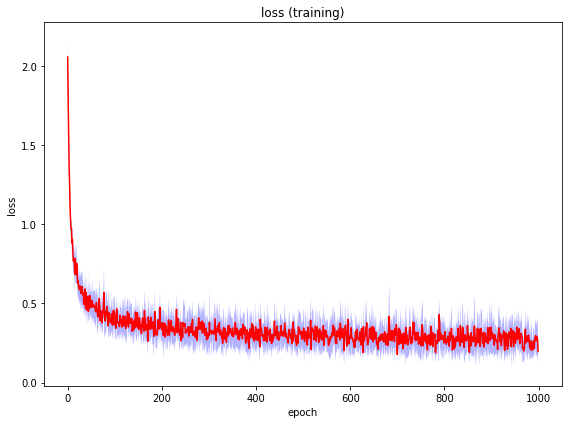

In [76]:
plot_curve_error(train_loss_mean_minibatch[0], train_loss_std_minibatch[0], 'epoch', 'loss', 'loss (training)')

## loss (training) curve : mini-batch size = 100, weight decay = 0

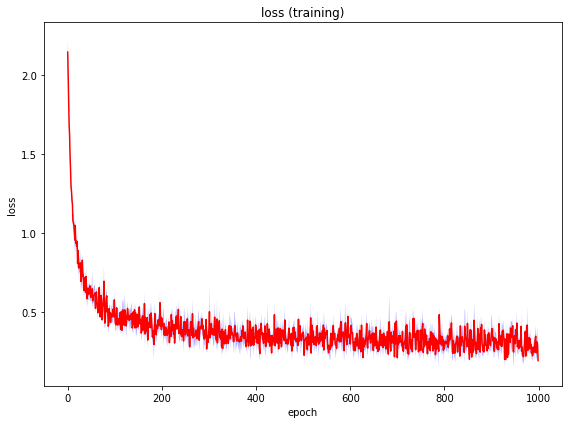

In [77]:
plot_curve_error(train_loss_mean_minibatch[1], train_loss_std_minibatch[1], 'epoch', 'loss', 'loss (training)')

## loss (training) curve : mini-batch size = 200, weight decay = 0

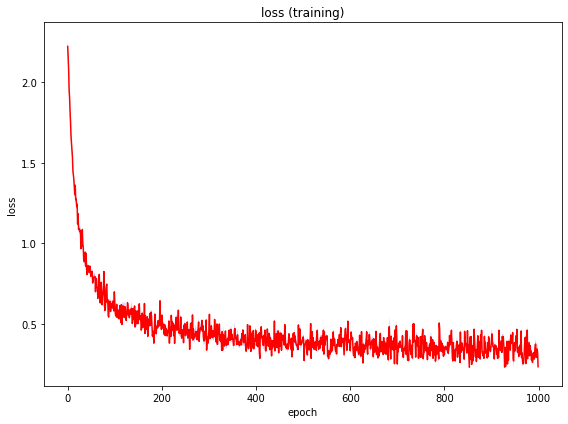

In [78]:
plot_curve_error(train_loss_mean_minibatch[2], train_loss_std_minibatch[2], 'epoch', 'loss', 'loss (training)')

## accuracy (training) curve : mini-batch size = 50, weight decay = 0

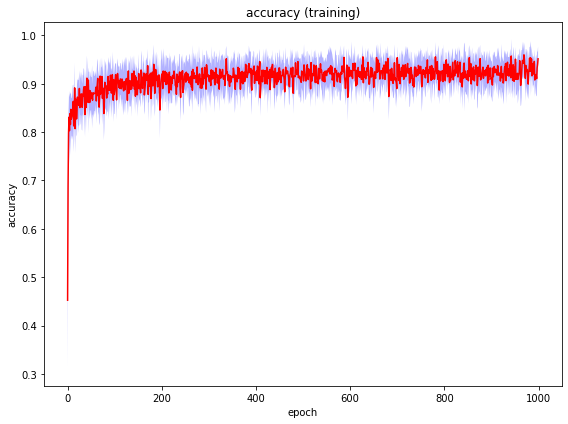

In [79]:
plot_curve_error(train_accuracy_mean_minibatch[0], train_accuracy_std_minibatch[0], 'epoch', 'accuracy', 'accuracy (training)')

## accuracy (training) curve : mini-batch size = 100, weight decay = 0

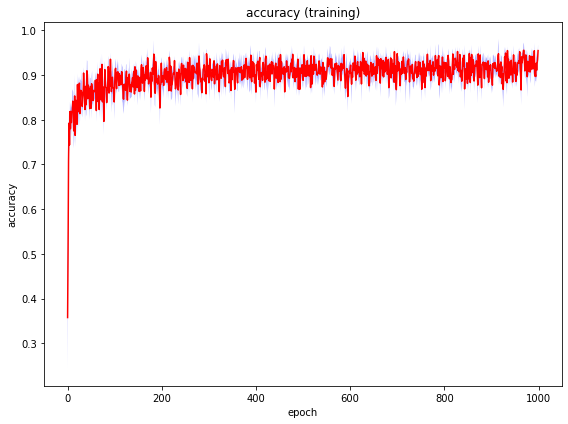

In [80]:
plot_curve_error(train_accuracy_mean_minibatch[1], train_accuracy_std_minibatch[1], 'epoch', 'accuracy', 'accuracy (training)')

## accuracy (training) curve : mini-batch size = 200, weight decay = 0

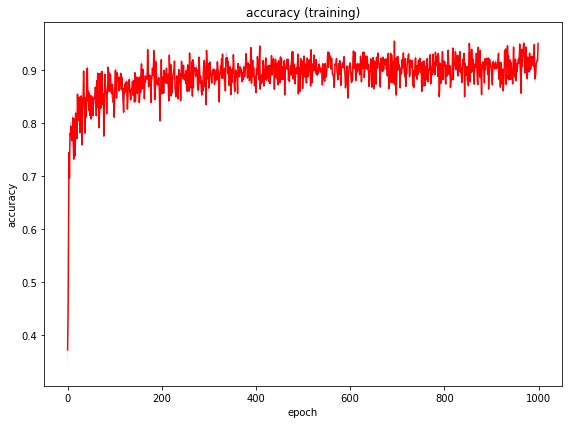

In [81]:
plot_curve_error(train_accuracy_mean_minibatch[2], train_accuracy_std_minibatch[2], 'epoch', 'accuracy', 'accuracy (training)')

## loss (testing) curve with different mini-batch

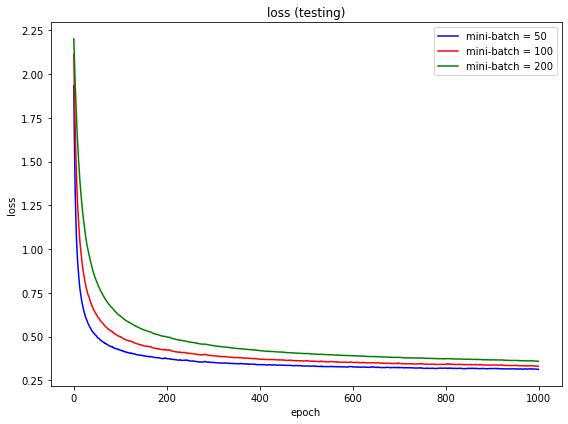

In [82]:
plot_curve3(test_loss_minibatch[0], 'mini-batch = 50', test_loss_minibatch[1], 'mini-batch = 100', test_loss_minibatch[2], 'mini-batch = 200', 'epoch', 'loss', 'loss (testing)')

## accuracy (testing) curve with different mini-batch

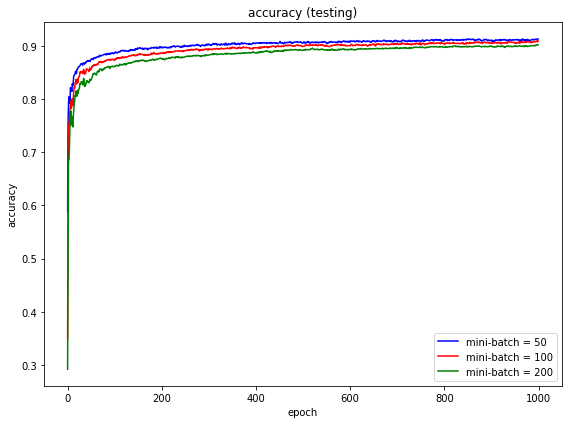

In [83]:
plot_curve3(test_accuracy_minibatch[0], 'mini-batch = 50', test_accuracy_minibatch[1], 'mini-batch = 100', test_accuracy_minibatch[2], 'mini-batch = 200', 'epoch', 'accuracy', 'accuracy (testing)')

## loss (testing) curve with different weight-decay

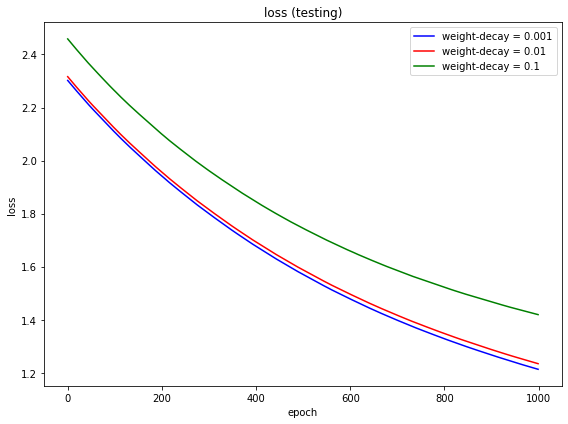

In [84]:
plot_curve3(test_loss_weight_decay[0], 'weight-decay = 0.001', test_loss_weight_decay[1], 'weight-decay = 0.01', test_loss_weight_decay[2], 'weight-decay = 0.1', 'epoch', 'loss', 'loss (testing)')

## accuracy (testing) curve with different weight-decay

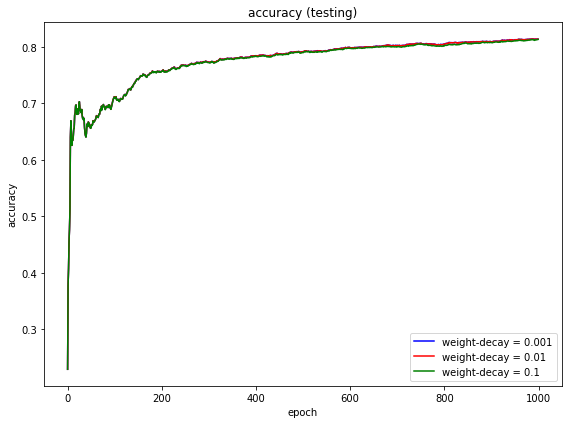

In [85]:
plot_curve3(test_accuracy_weight_decay[0], 'weight-decay = 0.001', test_accuracy_weight_decay[1], 'weight-decay = 0.01', test_accuracy_weight_decay[2], 'weight-decay = 0.1', 'epoch', 'accuracy', 'accuracy (testing)')

## print values

In [86]:
def print_curve(data, index):

    for i in range(len(index)):

        idx = index[i]
        val = data[idx]

        print('index = %4d, value = %12.10f' % (idx, val))

## given iterations at which the values are presented

In [87]:
index = np.array([0, 100, 200, 300, 400, 500, 600, 700, 800, 900])

## training loss (mean) : mini-batch = 50, weight-decay = 0

In [88]:
print_curve(train_loss_mean_minibatch[0], index)

index =    0, value = 2.0560588836
index =  100, value = 0.4306446987
index =  200, value = 0.3320909827
index =  300, value = 0.2960875438
index =  400, value = 0.3062522981
index =  500, value = 0.2952191681
index =  600, value = 0.2757524564
index =  700, value = 0.1769349148
index =  800, value = 0.2848810844
index =  900, value = 0.3080809302


## training loss (mean) : mini-batch = 100, weight-decay = 0

In [89]:
print_curve(train_loss_mean_minibatch[1], index)

index =    0, value = 2.1479585695
index =  100, value = 0.4953609167
index =  200, value = 0.4602746787
index =  300, value = 0.3873870430
index =  400, value = 0.3957756265
index =  500, value = 0.3723223070
index =  600, value = 0.2968243610
index =  700, value = 0.2093817535
index =  800, value = 0.2685225927
index =  900, value = 0.3706658267


## training loss (mean) : mini-batch = 200, weight-decay = 0

In [90]:
print_curve(train_loss_mean_minibatch[2], index)

index =    0, value = 2.2211471009
index =  100, value = 0.6261572129
index =  200, value = 0.5560203642
index =  300, value = 0.4660406125
index =  400, value = 0.4495679278
index =  500, value = 0.4210680409
index =  600, value = 0.3352522850
index =  700, value = 0.2530405961
index =  800, value = 0.3114110139
index =  900, value = 0.4001634240


## training accuracy (mean) : mini-batch = 50, weight-decay = 0 

In [91]:
print_curve(train_accuracy_mean_minibatch[0], index)

index =    0, value = 0.4523500000
index =  100, value = 0.8853000000
index =  200, value = 0.9199500000
index =  300, value = 0.9105500000
index =  400, value = 0.9079000000
index =  500, value = 0.9183500000
index =  600, value = 0.9242500000
index =  700, value = 0.9538000000
index =  800, value = 0.9180500000
index =  900, value = 0.9110500000


## training accuracy (mean) : mini-batch = 100, weight-decay = 0

In [92]:
print_curve(train_accuracy_mean_minibatch[1], index)

index =    0, value = 0.3576000000
index =  100, value = 0.8814500000
index =  200, value = 0.8839500000
index =  300, value = 0.8828000000
index =  400, value = 0.8619000000
index =  500, value = 0.8882500000
index =  600, value = 0.9155500000
index =  700, value = 0.9480500000
index =  800, value = 0.9165500000
index =  900, value = 0.8924000000


## training accuracy (mean) : mini-batch = 200, weight-decay = 0

In [93]:
print_curve(train_accuracy_mean_minibatch[2], index)

index =    0, value = 0.3714500000
index =  100, value = 0.8554500000
index =  200, value = 0.8551500000
index =  300, value = 0.8658000000
index =  400, value = 0.8575500000
index =  500, value = 0.8890000000
index =  600, value = 0.9130500000
index =  700, value = 0.9250000000
index =  800, value = 0.9131000000
index =  900, value = 0.8964500000


## training loss (mean) : mini-batch = 100, weight-decay = 0.001

In [94]:
print_curve(train_loss_mean_weight_decay[0], index)

index =    0, value = 2.3024392203
index =  100, value = 2.1065569018
index =  200, value = 1.9696276314
index =  300, value = 1.8147774366
index =  400, value = 1.6852724945
index =  500, value = 1.5827762291
index =  600, value = 1.4536014456
index =  700, value = 1.3347418531
index =  800, value = 1.3148392518
index =  900, value = 1.2586639137


## training loss (mean) : mini-batch = 100, weight-decay = 0.01

In [95]:
print_curve(train_loss_mean_weight_decay[1], index)

index =    0, value = 2.3166749004
index =  100, value = 2.1209564874
index =  200, value = 1.9844455217
index =  300, value = 1.8302473410
index =  400, value = 1.7015083603
index =  500, value = 1.5998127298
index =  600, value = 1.4716558413
index =  700, value = 1.3537588486
index =  800, value = 1.3345152524
index =  900, value = 1.2789609353


## training loss (mean) : mini-batch = 100, weight-decay = 0.1

In [96]:
print_curve(train_loss_mean_weight_decay[2], index)

index =    0, value = 2.4590175383
index =  100, value = 2.2621408255
index =  200, value = 2.1270368166
index =  300, value = 1.9765868680
index =  400, value = 1.8527502499
index =  500, value = 1.7563402908
index =  600, value = 1.6356316927
index =  700, value = 1.5247464852
index =  800, value = 1.5095593307
index =  900, value = 1.4579186942


## training accuracy (mean) : mini-batch = 100, weight-decay = 0.001

In [97]:
print_curve(train_accuracy_mean_weight_decay[0], index)

index =    0, value = 0.2993500000
index =  100, value = 0.6846000000
index =  200, value = 0.7068500000
index =  300, value = 0.7449000000
index =  400, value = 0.7243500000
index =  500, value = 0.7675500000
index =  600, value = 0.8558000000
index =  700, value = 0.8262000000
index =  800, value = 0.7787500000
index =  900, value = 0.8022000000


## training accuracy (mean) : mini-batch = 100, weight-decay = 0.01

In [98]:
print_curve(train_accuracy_mean_weight_decay[1], index)

index =    0, value = 0.2993500000
index =  100, value = 0.6846000000
index =  200, value = 0.7068500000
index =  300, value = 0.7449000000
index =  400, value = 0.7243500000
index =  500, value = 0.7675500000
index =  600, value = 0.8533000000
index =  700, value = 0.8262000000
index =  800, value = 0.7787500000
index =  900, value = 0.8022000000


## training accuracy (mean) : mini-batch = 100, weight-decay = 0.1

In [99]:
print_curve(train_accuracy_mean_weight_decay[2], index)

index =    0, value = 0.2993500000
index =  100, value = 0.6846000000
index =  200, value = 0.7070000000
index =  300, value = 0.7450000000
index =  400, value = 0.7243500000
index =  500, value = 0.7673500000
index =  600, value = 0.8499000000
index =  700, value = 0.8262000000
index =  800, value = 0.7886000000
index =  900, value = 0.8022000000


## function definition for presenting the results

In [100]:
def function_results_01(*args):
    index_class_plot = index_train[0][0][0:nPlot]
    plot_data_grid(x_train, index_class_plot, nRow, nCol)    
    pass

In [101]:
def function_results_02(*args):
    index_class_plot = index_train[1][0][0:nPlot]
    plot_data_grid(x_train, index_class_plot, nRow, nCol)    
    pass

In [102]:
def function_results_03(*args):
    index_class_plot = index_train[2][0][0:nPlot]
    plot_data_grid(x_train, index_class_plot, nRow, nCol)    
    pass

In [103]:
def function_results_04(*args):
    index_class_plot = index_train[3][0][0:nPlot]
    plot_data_grid(x_train, index_class_plot, nRow, nCol)    
    pass

In [104]:
def function_results_05(*args):
    index_class_plot = index_train[4][0][0:nPlot]
    plot_data_grid(x_train, index_class_plot, nRow, nCol)    
    pass

In [105]:
def function_results_06(*args):
    index_class_plot = index_train[5][0][0:nPlot]
    plot_data_grid(x_train, index_class_plot, nRow, nCol)    
    pass

In [106]:
def function_results_07(*args):
    index_class_plot = index_train[6][0][0:nPlot]
    plot_data_grid(x_train, index_class_plot, nRow, nCol)    
    pass

In [107]:
def function_results_08(*args):
    index_class_plot = index_train[7][0][0:nPlot]
    plot_data_grid(x_train, index_class_plot, nRow, nCol)    
    pass

In [108]:
def function_results_09(*args):
    index_class_plot = index_train[8][0][0:nPlot]
    plot_data_grid(x_train, index_class_plot, nRow, nCol)    
    pass

In [109]:
def function_results_10(*args):
    index_class_plot = index_train[9][0][0:nPlot]
    plot_data_grid(x_train, index_class_plot, nRow, nCol)    
    pass

In [110]:
def function_results_11(*args):
    plot_curve_error(train_loss_mean_minibatch[0], train_loss_std_minibatch[0], 'epoch', 'loss', 'loss (training)')
    pass

In [111]:
def function_results_12(*args):
    plot_curve_error(train_loss_mean_minibatch[1], train_loss_std_minibatch[1], 'epoch', 'loss', 'loss (training)')
    pass

In [112]:
def function_results_13(*args):
    plot_curve_error(train_loss_mean_minibatch[2], train_loss_std_minibatch[2], 'epoch', 'loss', 'loss (training)')
    pass

In [113]:
def function_results_14(*args):
    plot_curve_error(train_accuracy_mean_minibatch[0], train_accuracy_std_minibatch[0], 'epoch', 'accuracy', 'accuracy (training)')
    pass

In [114]:
def function_results_15(*args):
    plot_curve_error(train_accuracy_mean_minibatch[1], train_accuracy_std_minibatch[1], 'epoch', 'accuracy', 'accuracy (training)')
    pass

In [115]:
def function_results_16(*args):
    plot_curve_error(train_accuracy_mean_minibatch[2], train_accuracy_std_minibatch[2], 'epoch', 'accuracy', 'accuracy (training)')
    pass

In [116]:
def function_results_17(*args):
    plot_curve3(test_loss_minibatch[0], 'mini-batch = 50', test_loss_minibatch[1], 'mini-batch = 100', test_loss_minibatch[2], 'mini-batch = 200', 'epoch', 'loss', 'loss (testing)')
    pass

In [117]:
def function_results_18(*args):
    plot_curve3(test_accuracy_minibatch[0], 'mini-batch = 50', test_accuracy_minibatch[1], 'mini-batch = 100', test_accuracy_minibatch[2], 'mini-batch = 200', 'epoch', 'accuracy', 'accuracy (testing)')
    pass

In [118]:
def function_results_19(*args):
    plot_curve3(test_loss_weight_decay[0], 'weight-decay = 0.001', test_loss_weight_decay[1], 'weight-decay = 0.01', test_loss_weight_decay[2], 'weight-decay = 0.1', 'epoch', 'loss', 'loss (testing)')
    pass

In [119]:
def function_results_20(*args):
    plot_curve3(test_accuracy_weight_decay[0], 'weight-decay = 0.001', test_accuracy_weight_decay[1], 'weight-decay = 0.01', test_accuracy_weight_decay[2], 'weight-decay = 0.1', 'epoch', 'accuracy', 'accuracy (testing)')
    pass

In [120]:
def function_results_21(*args):
     print_curve(train_loss_mean_minibatch[1], index)
     pass

In [121]:
def function_results_22(*args):
    print_curve(train_accuracy_mean_minibatch[1], index)
    pass

In [122]:
def function_results_23(*args):
    print_curve(train_loss_mean_weight_decay[0], index)
    pass

In [123]:
def function_results_24(*args):
    print_curve(train_accuracy_mean_weight_decay[0], index) 
    pass

---

# RESULTS

---

## # 01. plot the input images for '0'

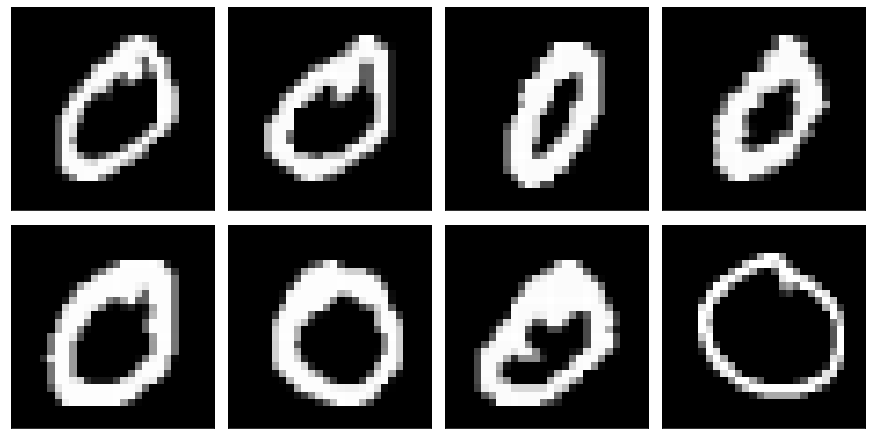

In [124]:
function_results_01(...)

## # 02. plot the input images for '1'

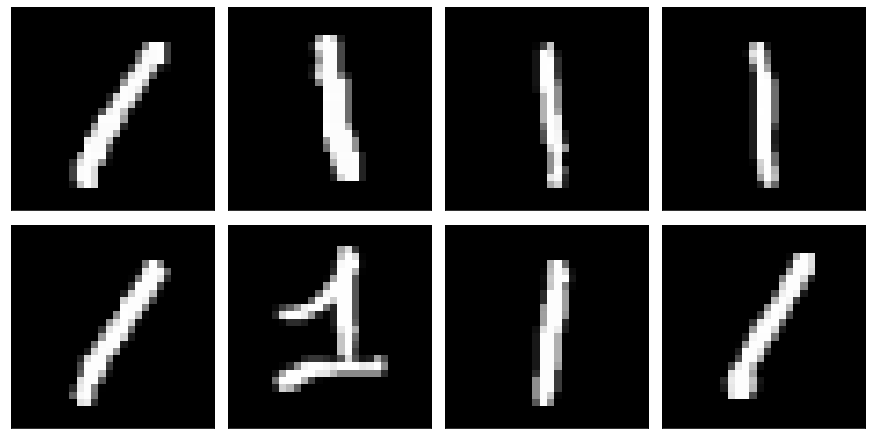

In [125]:
function_results_02(...)

## # 03. plot the input images for '2'

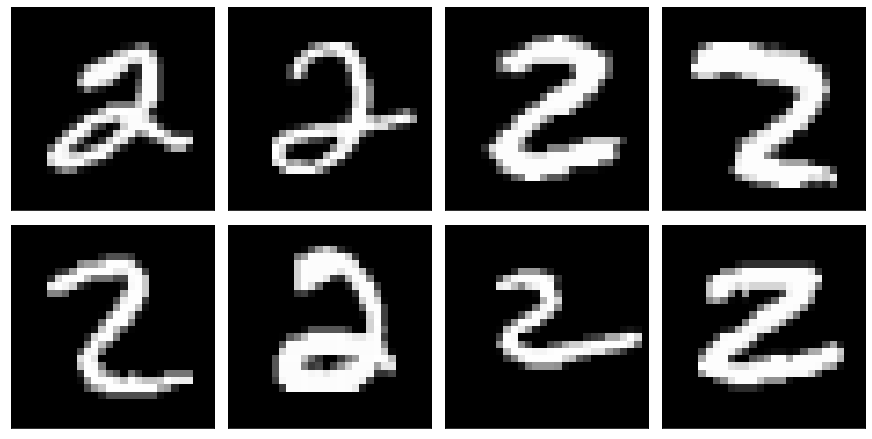

In [126]:
function_results_03(...)

## # 04. plot the input images for '3'

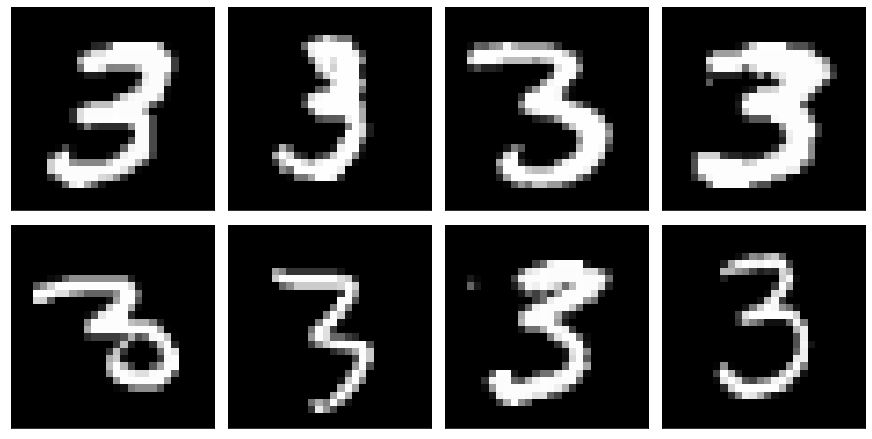

In [127]:
function_results_04(...)

## # 05. plot the input images for '4'

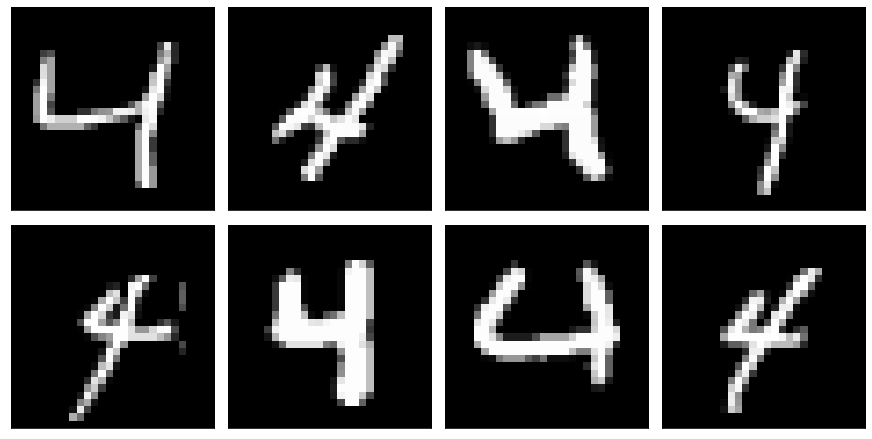

In [128]:
function_results_05(...)

## # 06. plot the input images for '5'

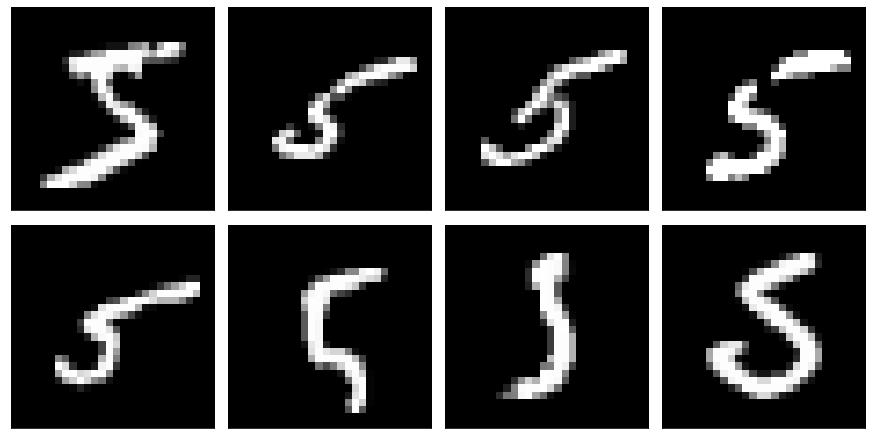

In [129]:
function_results_06(...)

## # 07. plot the input images for '6'

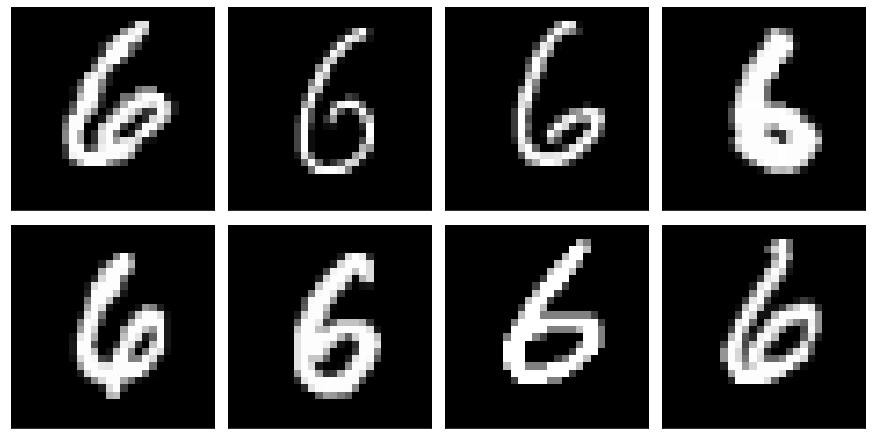

In [130]:
function_results_07(...)

## # 08. plot the input images for '7'

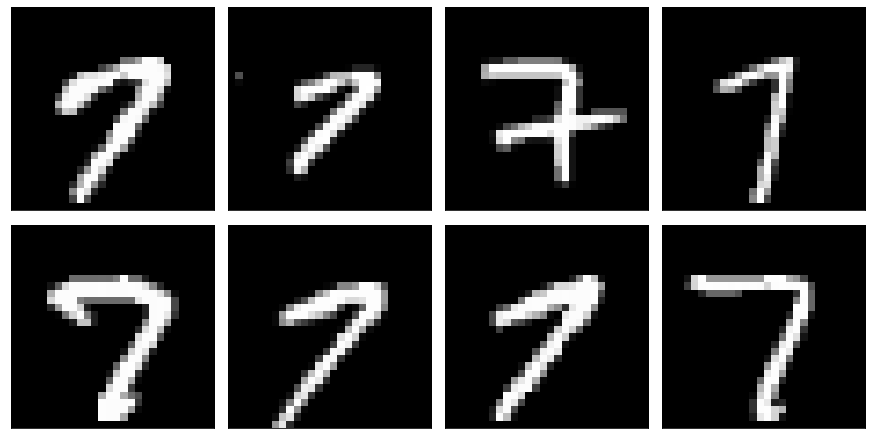

In [131]:
function_results_08(...)

## # 09. plot the input images for '8'

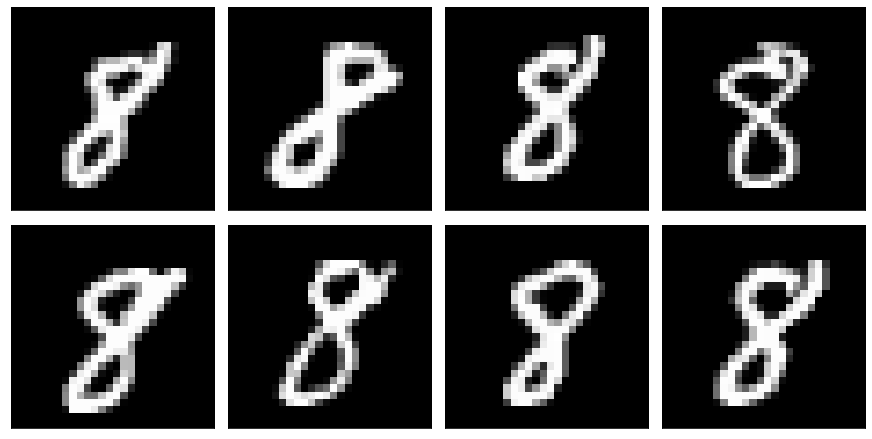

In [132]:
function_results_09(...)

## # 10. plot the input images for '9'

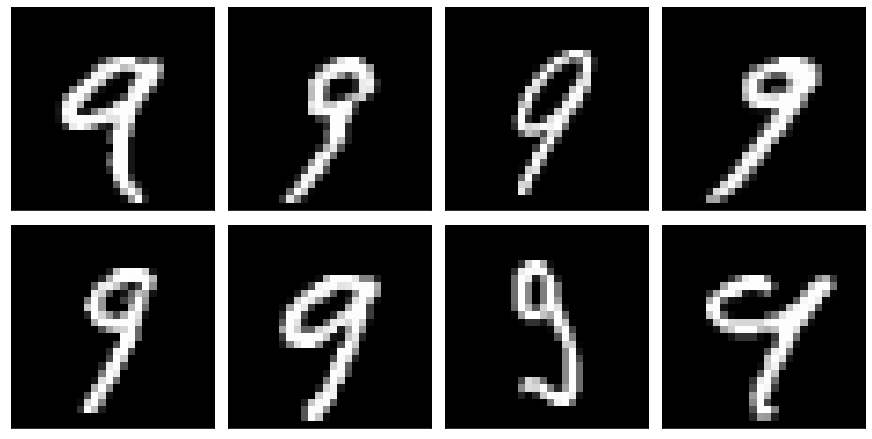

In [133]:
function_results_10(...)

## # 11. plot loss (training) curve (mean, std) : mini-batch size = 50, weight decay = 0

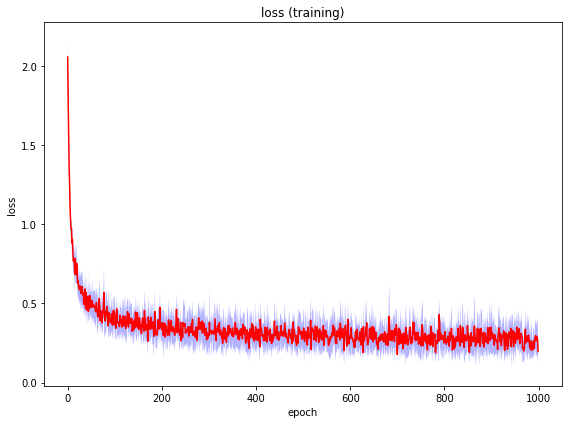

In [134]:
function_results_11(...)

## # 12. plot loss (training) curve (mean, std) : mini-batch size = 100, weight decay = 0

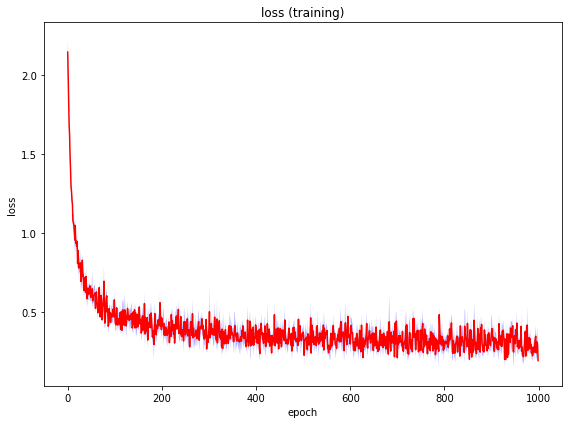

In [135]:
function_results_12(...)

## # 13. plot loss (training) curve (mean, std) : mini-batch size = 200, weight decay = 0

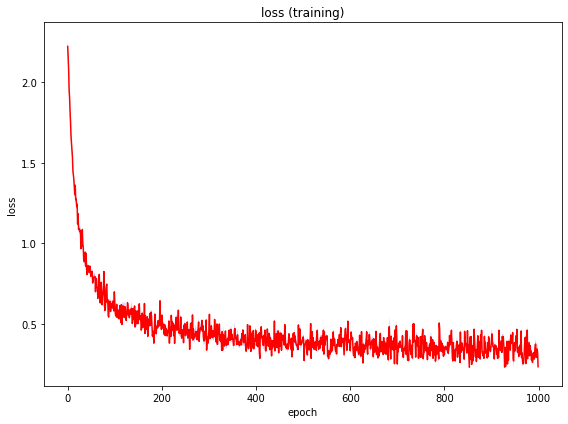

In [136]:
function_results_13(...)

## # 14. plot accuracy (training) curve (mean, std) : mini-batch size = 50, weight decay = 0

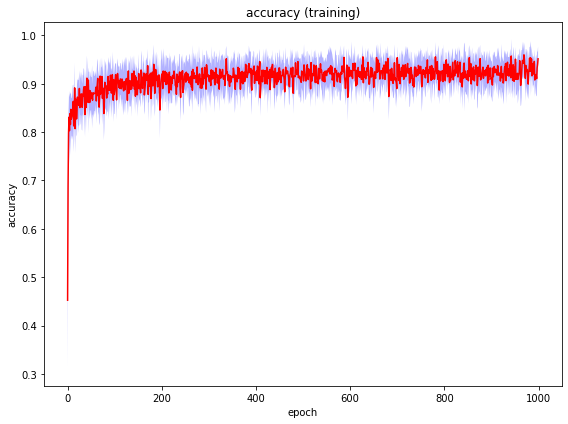

In [137]:
function_results_14(...)

## # 15. plot accuracy (training) curve (mean, std) : mini-batch size = 100, weight decay = 0

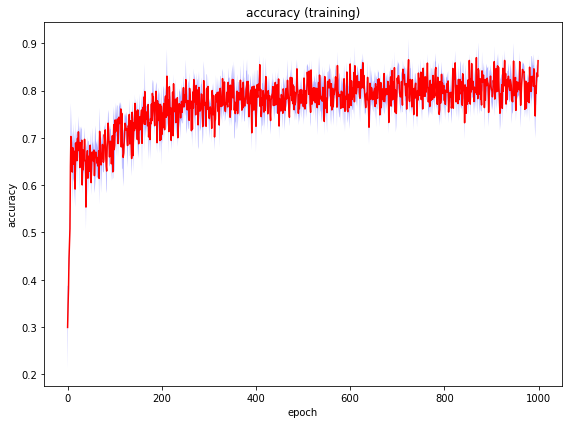

In [ ]:
function_results_15(...)

## # 16. plot accuracy (training) curve (mean, std) : mini-batch size = 200, weight decay = 0

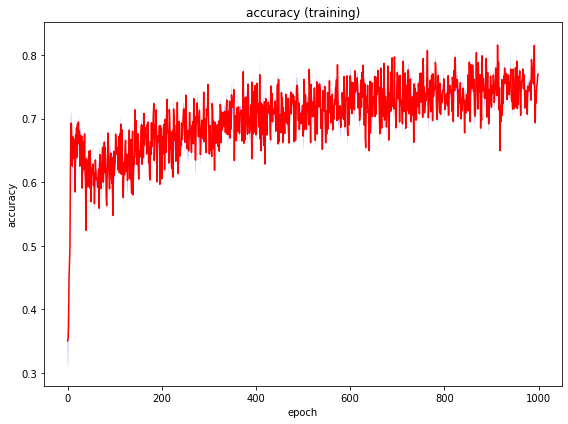

In [ ]:
function_results_16(...)

## # 17. plot loss (testing) curve (mean) with different mini-batch

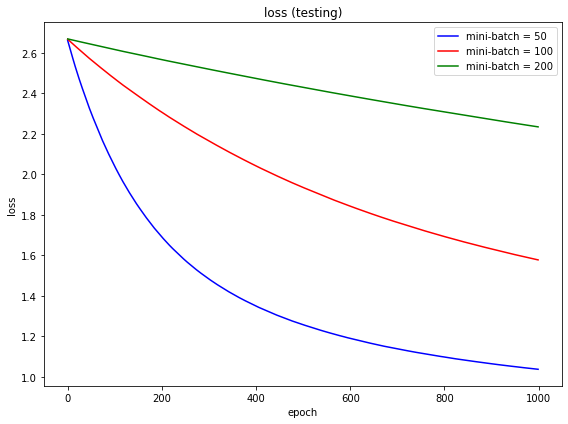

In [ ]:
function_results_17(...)

## # 18. plot accuracy (testing) curve (mean) with different mini-batch

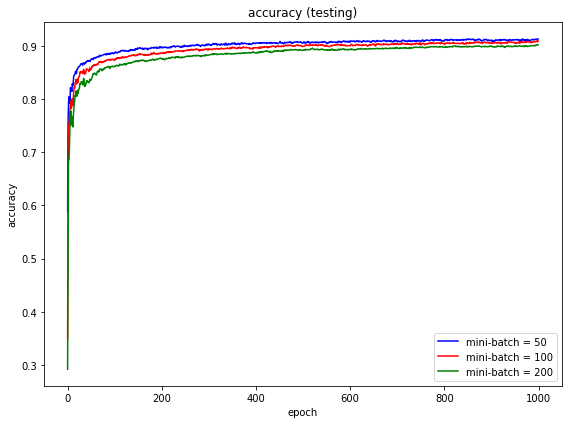

In [138]:
function_results_18(...)

## # 19. plot loss (testing) curve (mean) with different weight-decay

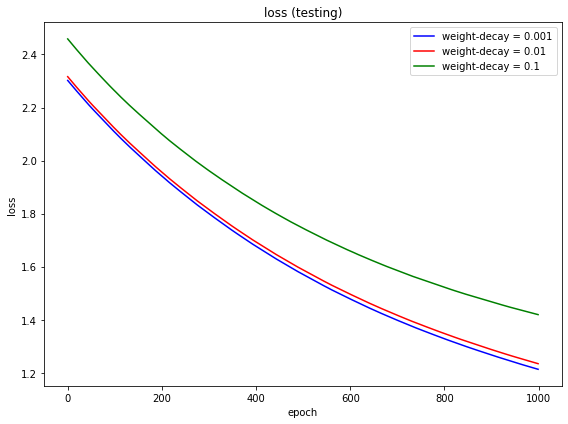

In [139]:
function_results_19(...)

## # 20. plot accuracy (testing) curve (mean) with different weight-decay

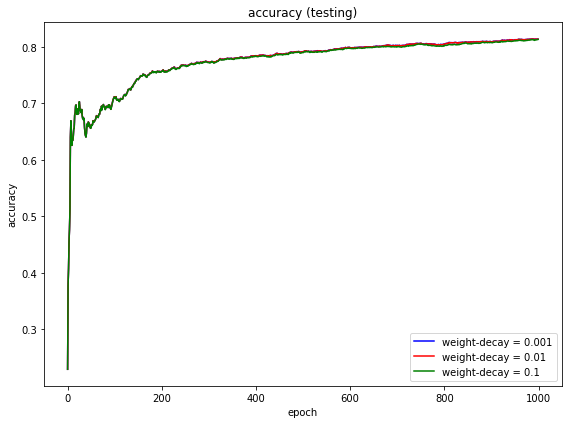

In [140]:
function_results_20(...)

## # 21. print training loss (mean) at iterations 0, 100, 200, 300, 400, 500, 600, 700, 800, 900 : mini-batch = 100, weight-decay = 0

In [141]:
function_results_21(...)

index =    0, value = 2.1479585695
index =  100, value = 0.4953609167
index =  200, value = 0.4602746787
index =  300, value = 0.3873870430
index =  400, value = 0.3957756265
index =  500, value = 0.3723223070
index =  600, value = 0.2968243610
index =  700, value = 0.2093817535
index =  800, value = 0.2685225927
index =  900, value = 0.3706658267


## # 22. print training accuracy (mean) at iterations 0, 100, 200, 300, 400, 500, 600, 700, 800, 900 : mini-batch = 100, weight-decay = 0

In [142]:
function_results_22(...)

index =    0, value = 0.3576000000
index =  100, value = 0.8814500000
index =  200, value = 0.8839500000
index =  300, value = 0.8828000000
index =  400, value = 0.8619000000
index =  500, value = 0.8882500000
index =  600, value = 0.9155500000
index =  700, value = 0.9480500000
index =  800, value = 0.9165500000
index =  900, value = 0.8924000000


## # 23. print training loss (mean) at iterations 0, 100, 200, 300, 400, 500, 600, 700, 800, 900 : mini-batch = 100, weight-decay = 0.001

In [143]:
function_results_23(...)

index =    0, value = 2.3024392203
index =  100, value = 2.1065569018
index =  200, value = 1.9696276314
index =  300, value = 1.8147774366
index =  400, value = 1.6852724945
index =  500, value = 1.5827762291
index =  600, value = 1.4536014456
index =  700, value = 1.3347418531
index =  800, value = 1.3148392518
index =  900, value = 1.2586639137


## # 24. print training accuracy (mean) at iterations 0, 100, 200, 300, 400, 500, 600, 700, 800, 900 : mini-batch = 100, weight-decay = 0.001

In [144]:
function_results_24(...)

index =    0, value = 0.2993500000
index =  100, value = 0.6846000000
index =  200, value = 0.7068500000
index =  300, value = 0.7449000000
index =  400, value = 0.7243500000
index =  500, value = 0.7675500000
index =  600, value = 0.8558000000
index =  700, value = 0.8262000000
index =  800, value = 0.7787500000
index =  900, value = 0.8022000000
